In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Verify drive contents
!ls /content/drive/MyDrive/

Mounted at /content/drive
 best_resnet50_finetuned.pth	  Documents		     resnet50_checkpoint.pth
 best_resnet50_finetuned_v2.pth   ideas.gdoc		     resnet50_finetuned.pth
'Billing Project'		 'Medicare Data Project'     Spam
 Bone_Break_Classification.zip	 'Portfolio Website'	    'x rays project'
 Budget.gsheet			 'Pre 2k25'
'Colab Notebooks'		  preprocessed_dataset.zip


In [ ]:
!unzip "/content/drive/MyDrive/Bone_Break_Classification.zip" -d "/content/"

Archive:  /content/drive/MyDrive/Bone_Break_Classification.zip
   creating: /content/Bone_Break_Classification/
   creating: /content/Bone_Break_Classification/Greenstick_fracture/
   creating: /content/Bone_Break_Classification/Greenstick_fracture/Test/
  inflating: /content/Bone_Break_Classification/Greenstick_fracture/Test/1-s2-0-S1930043321005148-gr1_j.rf.ea5be53ec584c7fa9e3e1ddba7210dd5.jpg  
  inflating: /content/Bone_Break_Classification/Greenstick_fracture/Test/40926tn_jpg.rf.95b23c6c30cc0d022f5af322fe72b9ce.jpg  
  inflating: /content/Bone_Break_Classification/Greenstick_fracture/Test/_Fracture_general_principles_fig04_Torus_Greenstick_fracture_BLANCO-1024x957_jpg.d0a0708a95fcb18cbbdf0af9de020488.jpg  
  inflating: /content/Bone_Break_Classification/Greenstick_fracture/Test/5081d90aea64c_jpg.rf.236544b7b485ea3c53214f7c1ae90430.jpg  
  inflating: /content/Bone_Break_Classification/Greenstick_fracture/Test/6550e902d0af421ad3b94f073620d1_gallery_jpeg.rf.c23760797e0bcc7af6ab143270

In [ ]:
import os

# Define the dataset root path
dataset_path = "/content/Bone_Break_Classification"

# Normalize folder names
for fracture_type in os.listdir(dataset_path):
    old_path = os.path.join(dataset_path, fracture_type)

    # Ensure it's a directory
    if os.path.isdir(old_path):
        # Convert to lowercase and replace spaces with underscores
        new_name = fracture_type.lower().replace(" ", "_")
        new_path = os.path.join(dataset_path, new_name)

        # Rename folder if different
        if old_path != new_path:
            os.rename(old_path, new_path)
            print(f"✅ Renamed: {old_path} → {new_path}")

# Fix train/test folder names inside each fracture type folder
dataset_path = "/content/Bone_Break_Classification"

for fracture_type in os.listdir(dataset_path):
    fracture_path = os.path.join(dataset_path, fracture_type)

    if os.path.isdir(fracture_path):
        for folder in os.listdir(fracture_path):
            old_path = os.path.join(fracture_path, folder)
            new_path = os.path.join(fracture_path, folder.lower())  # Convert to lowercase

            if old_path != new_path:
                os.rename(old_path, new_path)
                print(f"✅ Renamed: {old_path} → {new_path}")


✅ Renamed: /content/Bone_Break_Classification/longitudinal_fracture/Test → /content/Bone_Break_Classification/longitudinal_fracture/test
✅ Renamed: /content/Bone_Break_Classification/longitudinal_fracture/Train → /content/Bone_Break_Classification/longitudinal_fracture/train
✅ Renamed: /content/Bone_Break_Classification/impacted_fracture/Test → /content/Bone_Break_Classification/impacted_fracture/test
✅ Renamed: /content/Bone_Break_Classification/impacted_fracture/Train → /content/Bone_Break_Classification/impacted_fracture/train
✅ Renamed: /content/Bone_Break_Classification/avulsion_fracture/Test → /content/Bone_Break_Classification/avulsion_fracture/test
✅ Renamed: /content/Bone_Break_Classification/avulsion_fracture/.DS_Store → /content/Bone_Break_Classification/avulsion_fracture/.ds_store
✅ Renamed: /content/Bone_Break_Classification/avulsion_fracture/Train → /content/Bone_Break_Classification/avulsion_fracture/train
✅ Renamed: /content/Bone_Break_Classification/spiral_fracture/Tes

In [10]:
bad_images = []

for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            for img_name in os.listdir(folder):
                img_path = os.path.join(folder, img_name)
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Will raise an error if corrupt
                except:
                    bad_images.append(img_path)

# Display corrupt images
if bad_images:
    print(f"⚠️ Found {len(bad_images)} corrupt images:")
    for bad_img in bad_images[:10]:  # Show only first 10
        print(bad_img)
else:
    print("✅ No corrupt images found!")


📂 Moving Bone_Break_Classification → /content/cleaned_dataset/Bone_Break_Classification
📂 Moving preprocessed_dataset → /content/cleaned_dataset/preprocessed_dataset
✅ All class folders moved into cleaned_dataset successfully!


In [ ]:
from PIL import Image

test_image_path = "/content/Bone_Break_Classification/longitudinal_fracture/train/image3_jpeg.rf.506ce4843e3698a1399802a4e03413b3.jpg"

try:
    img = Image.open(test_image_path)
    img.show()  # If the image opens, it's NOT corrupt
except Exception as e:
    print(f"⚠️ Cannot open image: {test_image_path} | Error: {e}")


In [ ]:
# List all file extensions in the dataset
file_extensions = set()

for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            for img_name in os.listdir(folder):
                file_extensions.add(img_name.split(".")[-1])  # Get file extension

print(f"📂 Unique file extensions found: {file_extensions}")


📂 Unique file extensions found: {'jpg'}


In [ ]:
test_image_path = "/content/Bone_Break_Classification/longitudinal_fracture/train/image3_jpeg.rf.506ce4843e3698a1399802a4e03413b3.jpg"

try:
    with open(test_image_path, "rb") as f:
        raw_data = f.read(10)  # Read first 10 bytes
        print(f"✅ Successfully read first 10 bytes: {raw_data}")
except Exception as e:
    print(f"⚠️ Cannot read file as raw bytes: {test_image_path} | Error: {e}")


✅ Successfully read first 10 bytes: b'\xff\xd8\xff\xe0\x00\x10JFIF'


In [ ]:
test_image_path = "/content/Bone_Break_Classification/longitudinal_fracture/train/image3_jpeg.rf.506ce4843e3698a1399802a4e03413b3.jpg"

try:
    with Image.open(test_image_path) as img:
        img = img.convert("RGBA")  # Convert to RGBA format
        img.show()
        print("✅ Successfully opened image in RGBA mode!")
except Exception as e:
    print(f"⚠️ Still cannot open image: {test_image_path} | Error: {e}")


✅ Successfully opened image in RGBA mode!


In [ ]:
corrupt_count = {}

for img_path in bad_images:
    fracture_type = img_path.split("/")[-3]  # Extract fracture type from path
    corrupt_count[fracture_type] = corrupt_count.get(fracture_type, 0) + 1

# Print sorted results
sorted_corrupt = sorted(corrupt_count.items(), key=lambda x: x[1], reverse=True)
print("\n📊 Corrupt Image Distribution:")
for fracture, count in sorted_corrupt:
    print(f"{fracture}: {count} corrupt images")



📊 Corrupt Image Distribution:


In [ ]:
test_image_path = "/content/Bone_Break_Classification/longitudinal_fracture/train/image3_jpeg.rf.506ce4843e3698a1399802a4e03413b3.jpg"
fixed_image_path = test_image_path.replace(".jpg", "_fixed.jpg")

try:
    with Image.open(test_image_path) as img:
        img = img.convert("RGB")  # Convert to standard RGB
        img.save(fixed_image_path, "JPEG", quality=95)
        print(f"✅ Successfully re-saved image to: {fixed_image_path}")
except Exception as e:
    print(f"⚠️ Could not fix image: {test_image_path} | Error: {e}")


✅ Successfully re-saved image to: /content/Bone_Break_Classification/longitudinal_fracture/train/image3_jpeg.rf.506ce4843e3698a1399802a4e03413b3_fixed.jpg


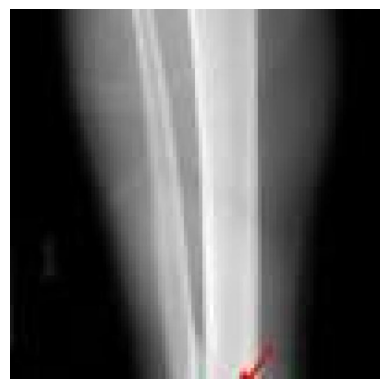

In [ ]:
import matplotlib.pyplot as plt

test_image_path = "/content/Bone_Break_Classification/longitudinal_fracture/train/image3_jpeg.rf.506ce4843e3698a1399802a4e03413b3.jpg"

img = Image.open(test_image_path)

plt.imshow(img)
plt.axis("off")  # Hide axis labels
plt.show()


In [ ]:
import os
from PIL import Image
from tqdm import tqdm  # Progress bar for tracking

# Define the dataset path
dataset_path = "/content/Bone_Break_Classification"

# Collect all "corrupt" images again (since some were flagged incorrectly before)
bad_images = []

for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            for img_name in os.listdir(folder):
                img_path = os.path.join(folder, img_name)
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Just check if the file is readable
                except:
                    bad_images.append(img_path)

# Fix all images
if bad_images:
    print(f"🔄 Fixing {len(bad_images)} images...")

    for img_path in tqdm(bad_images, desc="Fixing Images"):
        try:
            with Image.open(img_path) as img:
                img = img.convert("RGB")  # Ensure standard RGB format
                img.save(img_path, "JPEG", quality=95)  # Overwrite original
        except Exception as e:
            print(f"⚠️ Could not fix {img_path}: {e}")

    print(f"✅ Finished fixing {len(bad_images)} images!")
else:
    print("🎉 No images needed fixing!")


🎉 No images needed fixing!


In [ ]:
from collections import defaultdict

image_sizes = defaultdict(int)

for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            for img_name in os.listdir(folder):
                img_path = os.path.join(folder, img_name)

                try:
                    with Image.open(img_path) as img:
                        size = img.size  # (width, height)
                        image_sizes[size] += 1
                except Exception as e:
                    print(f"⚠️ Skipping unreadable image: {img_path} | Error: {e}")

# Display unique image sizes
print("\n📊 Unique Image Sizes in Dataset:")
for size, count in sorted(image_sizes.items(), key=lambda x: x[1], reverse=True):
    print(f"{size}: {count} images")



📊 Unique Image Sizes in Dataset:
(640, 640): 381 images
(291, 640): 4 images
(640, 590): 4 images
(150, 640): 4 images
(163, 640): 4 images
(170, 640): 3 images
(279, 640): 3 images
(214, 640): 3 images
(640, 639): 3 images
(248, 640): 3 images
(320, 640): 3 images
(515, 515): 3 images
(289, 640): 3 images
(219, 640): 3 images
(282, 640): 3 images
(193, 640): 3 images
(312, 640): 3 images
(329, 640): 3 images
(296, 640): 3 images
(213, 640): 3 images
(206, 640): 3 images
(275, 640): 3 images
(286, 640): 3 images
(277, 640): 3 images
(316, 640): 3 images
(186, 569): 3 images
(157, 640): 2 images
(532, 640): 2 images
(331, 640): 2 images
(531, 640): 2 images
(153, 640): 2 images
(640, 573): 2 images
(542, 640): 2 images
(232, 640): 2 images
(299, 636): 2 images
(177, 640): 2 images
(525, 640): 2 images
(636, 596): 2 images
(241, 640): 2 images
(288, 310): 2 images
(307, 640): 2 images
(300, 640): 2 images
(243, 640): 2 images
(262, 640): 2 images
(293, 640): 2 images
(297, 640): 2 image

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm

# Define target size
TARGET_SIZE = (640, 640)

# Function to resize while maintaining aspect ratio
def resize_with_padding(image, target_size):
    old_size = image.shape[:2]  # (height, width)
    ratio = min(target_size[0] / old_size[0], target_size[1] / old_size[1])  # Scale factor

    new_size = (int(old_size[1] * ratio), int(old_size[0] * ratio))  # (width, height)
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

    # Create new blank image with target size
    padded_image = np.zeros((target_size[1], target_size[0], 3), dtype=np.uint8)

    # Center the resized image
    x_offset = (target_size[0] - new_size[0]) // 2
    y_offset = (target_size[1] - new_size[1]) // 2
    padded_image[y_offset:y_offset + new_size[1], x_offset:x_offset + new_size[0]] = resized_image

    return padded_image

# Process all images
dataset_path = "/content/Bone_Break_Classification"

for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            for img_name in tqdm(os.listdir(folder), desc=f"Resizing {fracture_type}/{split}"):
                img_path = os.path.join(folder, img_name)
                try:
                    image = cv2.imread(img_path)
                    if image is None:
                        print(f"⚠️ Skipping unreadable image: {img_path}")
                        continue

                    resized_image = resize_with_padding(image, TARGET_SIZE)
                    cv2.imwrite(img_path, resized_image)  # Overwrite the original image

                except Exception as e:
                    print(f"⚠️ Could not resize image: {img_path} | Error: {e}")

print("✅ All images resized to 640x640 with padding!")


Resizing oblique_fracture/test: 100%|██████████| 16/16 [00:00<00:00, 278.60it/s]

✅ All images resized to 640x640 with padding!



📊 Class Distribution:
fracture_dislocation: 156 images
comminuted_fracture: 148 images
pathological_fracture: 134 images
avulsion_fracture: 123 images
greenstick_fracture: 122 images
hairline_fracture: 111 images
spiral_fracture: 86 images
oblique_fracture: 85 images
impacted_fracture: 84 images
longitudinal_fracture: 81 images


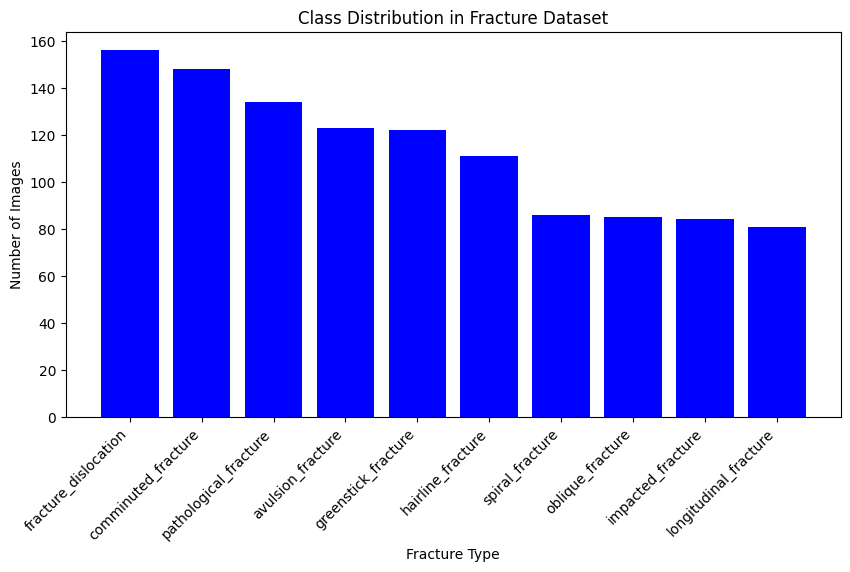

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Count number of images per class
class_counts = defaultdict(int)

for fracture_type in os.listdir(dataset_path):
    for split in ["train", "test"]:
        folder = os.path.join(dataset_path, fracture_type, split)
        if os.path.isdir(folder):
            num_images = len(os.listdir(folder))
            class_counts[fracture_type] += num_images  # Add both train & test

# Sort by class count
sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

# Print results
print("\n📊 Class Distribution:")
for class_name, count in sorted_counts:
    print(f"{class_name}: {count} images")

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in sorted_counts], [x[1] for x in sorted_counts], color="blue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Fracture Type")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Fracture Dataset")
plt.show()


In [ ]:
import random
import shutil
from tqdm import tqdm

# Target number of images per class (based on most common class)
TARGET_IMAGES = 156  # Match the highest count class

for fracture_type, count in class_counts.items():
    train_folder = os.path.join(dataset_path, fracture_type, "train")

    if count < TARGET_IMAGES:
        print(f"📈 Oversampling {fracture_type} ({count} → {TARGET_IMAGES})")

        images = os.listdir(train_folder)
        num_to_add = TARGET_IMAGES - count

        for i in tqdm(range(num_to_add), desc=f"Duplicating {fracture_type}"):
            img_path = random.choice(images)  # Randomly select an image
            src = os.path.join(train_folder, img_path)
            new_filename = f"dup_{i}_{img_path}"  # Unique name for duplicate
            dst = os.path.join(train_folder, new_filename)
            shutil.copy(src, dst)  # Copy the image


📈 Oversampling longitudinal_fracture (81 → 156)


Duplicating longitudinal_fracture: 100%|██████████| 75/75 [00:00<00:00, 2296.89it/s]


📈 Oversampling impacted_fracture (84 → 156)


Duplicating impacted_fracture: 100%|██████████| 72/72 [00:00<00:00, 2522.76it/s]


📈 Oversampling avulsion_fracture (123 → 156)


Duplicating avulsion_fracture: 100%|██████████| 33/33 [00:00<00:00, 2428.03it/s]


📈 Oversampling spiral_fracture (86 → 156)


Duplicating spiral_fracture: 100%|██████████| 70/70 [00:00<00:00, 3449.02it/s]


📈 Oversampling greenstick_fracture (122 → 156)


Duplicating greenstick_fracture: 100%|██████████| 34/34 [00:00<00:00, 3271.84it/s]


📈 Oversampling hairline_fracture (111 → 156)


Duplicating hairline_fracture: 100%|██████████| 45/45 [00:00<00:00, 3453.30it/s]


📈 Oversampling comminuted_fracture (148 → 156)


Duplicating comminuted_fracture: 100%|██████████| 8/8 [00:00<00:00, 1747.35it/s]


📈 Oversampling pathological_fracture (134 → 156)


Duplicating pathological_fracture: 100%|██████████| 22/22 [00:00<00:00, 2052.74it/s]


📈 Oversampling oblique_fracture (85 → 156)


Duplicating oblique_fracture: 100%|██████████| 71/71 [00:00<00:00, 3661.35it/s]


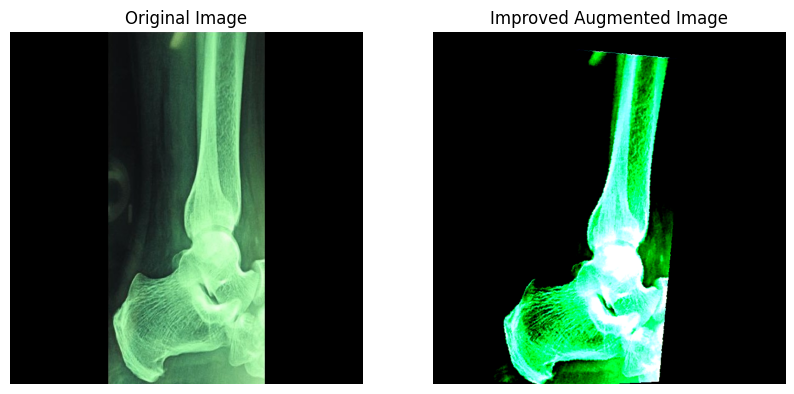

In [ ]:
# Define improved augmentation pipeline
train_transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Ensure uniform size
    transforms.RandomResizedCrop(640, scale=(0.9, 1.0)),  # Reduce cropping
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), scale=(0.95, 1.05)),  # Less aggressive transforms
    transforms.RandomHorizontalFlip(p=0.5),  # Keep flip
    transforms.RandomRotation(5),  # Reduce rotation angle
    transforms.ColorJitter(brightness=0.03, contrast=0.05),  # Lower brightness/contrast adjustments
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization
])

# Reload and apply new transformations
original_img = Image.open(img_path)
transformed_img = train_transform(original_img)

# Display before & after
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(original_img)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(transformed_img.permute(1, 2, 0).clip(0, 1))  # Clip values to fix display issues
ax[1].set_title("Improved Augmented Image")
ax[1].axis("off")

plt.show()


In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from collections import defaultdict

class FractureDataset(Dataset):
    def __init__(self, root_dir, split="train", transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.class_to_idx = {}

        # ✅ Only keep actual class folders
        fracture_classes = sorted([
            f for f in os.listdir(root_dir)
            if os.path.isdir(os.path.join(root_dir, f)) and not f.startswith(".")  # Ignore hidden files
        ])
        self.class_to_idx = {cls: idx for idx, cls in enumerate(fracture_classes)}

        # ✅ Iterate over each fracture type folder
        for fracture_class in fracture_classes:
            class_folder = os.path.join(root_dir, fracture_class, split)
            if os.path.exists(class_folder):
                for img_name in os.listdir(class_folder):
                    img_path = os.path.join(class_folder, img_name)
                    if img_path.lower().endswith((".png", ".jpg", ".jpeg")):
                        self.image_paths.append(img_path)
                        self.labels.append(self.class_to_idx[fracture_class])

        print(f"📂 Loaded {split} dataset | {len(self.image_paths)} images across {len(self.class_to_idx)} classes")


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

# ✅ Define dataset path
dataset_path = "/content/Bone_Break_Classification"

# ✅ Define transformations
train_transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), scale=(0.95, 1.05)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(5),
    transforms.ColorJitter(brightness=0.02, contrast=0.02),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Load datasets
train_dataset = FractureDataset(root_dir=dataset_path, split="train", transform=train_transform)
test_dataset = FractureDataset(root_dir=dataset_path, split="test", transform=test_transform)

# ✅ Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)


📂 Loaded train dataset | 1420 images across 10 classes
📂 Loaded test dataset | 140 images across 10 classes


In [4]:
# Check class distribution again
from collections import Counter

label_counts = Counter(train_dataset.labels)
for class_name, class_idx in train_dataset.class_to_idx.items():
    print(f"{class_name}: {label_counts[class_idx]} images")


avulsion_fracture: 142 images
comminuted_fracture: 142 images
fracture_dislocation: 137 images
greenstick_fracture: 140 images
hairline_fracture: 146 images
impacted_fracture: 147 images
longitudinal_fracture: 144 images
oblique_fracture: 140 images
pathological_fracture: 138 images
spiral_fracture: 144 images


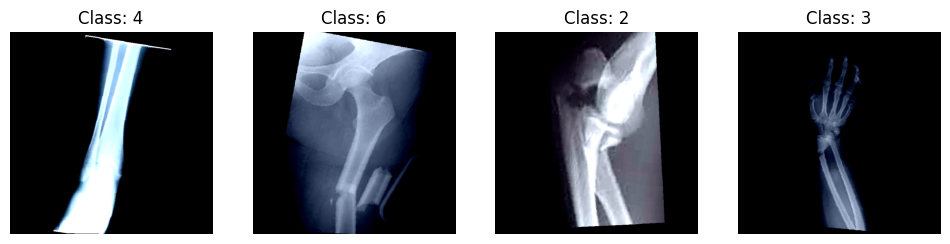

In [ ]:
import matplotlib.pyplot as plt

# Load some images
sample_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
images, labels = next(iter(sample_loader))

# Display images
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
for i in range(4):
    img = images[i].permute(1, 2, 0).numpy()  # Convert tensor to NumPy
    img = img * 0.5 + 0.5  # Unnormalize
    axes[i].imshow(img)
    axes[i].set_title(f"Class: {labels[i].item()}")
    axes[i].axis("off")
plt.show()


In [ ]:
for images, labels in train_loader:
    print("✅ Batch Loaded:", images.shape, labels.shape)
    break


✅ Batch Loaded: torch.Size([64, 3, 640, 640]) torch.Size([64])


In [9]:
import shutil

# Remove .DS_Store files in all directories
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower() == ".ds_store":
            file_path = os.path.join(root, file)
            print(f"🗑️ Removing: {file_path}")
            os.remove(file_path)

# Re-load dataset
train_dataset = FractureDataset(dataset_path, transform=train_transform, mode="train")
test_dataset = FractureDataset(dataset_path, transform=test_transform, mode="test")


📂 Loaded train dataset | 1420 images across 10 classes
📂 Loaded test dataset | 140 images across 10 classes


In [ ]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# ✅ Set Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# ✅ Debug Mode Settings (Smaller Images, Smaller Batch)
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ✅ Reduce from 640x640
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Custom Dataset Loader (Handles Subdirectories)
class FractureDataset(Dataset):
    def __init__(self, root_dir, transform=None, mode="train"):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(root_dir))  # List all class folders
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

        for class_name in self.classes:
            class_folder = os.path.join(root_dir, class_name, mode)  # Go inside train/test subfolders
            if os.path.isdir(class_folder):
                for img_name in os.listdir(class_folder):
                    img_path = os.path.join(class_folder, img_name)
                    if img_path.lower().endswith((".png", ".jpg", ".jpeg")):
                        self.image_paths.append(img_path)
                        self.labels.append(self.class_to_idx[class_name])

        print(f"📂 Loaded {mode} dataset | {len(self.image_paths)} images across {len(self.classes)} classes")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

# ✅ Set dataset path
dataset_path = "/content/Bone_Break_Classification"

# ✅ Load train and test datasets properly
train_dataset = FractureDataset(dataset_path, transform=train_transform, mode="train")
test_dataset = FractureDataset(dataset_path, transform=test_transform, mode="test")

# ✅ Batch Size 8 (Safe for CPU)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=0)

# ✅ Use MobileNetV2 for Fast Debugging
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(train_dataset.classes))  # ✅ Adjust for class count
model = model.to(device)

# ✅ Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-2)

# ✅ Quick Debug Training (1 Epoch Only)
print("🚀 Starting Debug Training...")
for epoch in range(1):  # ✅ Just 1 epoch for checking
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    print(f"✅ Debug Epoch 1 | Loss: {total_loss:.4f} | Train Accuracy: {train_acc:.4f}")

print("🚀 Debug Training Complete! Ready for GPU Execution!")


✅ Using device: cpu
📂 Loaded train dataset | 1420 images across 11 classes
📂 Loaded test dataset | 140 images across 11 classes


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 65.9MB/s]


🚀 Starting Debug Training...
✅ Debug Epoch 1 | Loss: 375.1818 | Train Accuracy: 0.2585
🚀 Debug Training Complete! Ready for GPU Execution!


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2, pin_memory=True)

# ✅ Reduce image size for speed test
train_transform = transforms.Compose([
    transforms.Resize((320, 320)),  # ⬇️ Reduce from 640x640
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Quick Training Run (3 Epochs)
for epoch in range(3):
    for images, labels in train_loader:
        images, labels = images.to("cpu"), labels.to("cpu")
        print(f"✅ Mini-Batch | Shape: {images.shape} | Labels: {labels.tolist()}")
        break  # Only process 1 batch per epoch for testing


✅ Mini-Batch | Shape: torch.Size([16, 3, 640, 640]) | Labels: [7, 0, 6, 7, 7, 5, 0, 6, 3, 9, 8, 5, 6, 2, 9, 3]
✅ Mini-Batch | Shape: torch.Size([16, 3, 640, 640]) | Labels: [6, 9, 0, 7, 2, 0, 1, 4, 1, 5, 0, 8, 5, 0, 0, 9]
✅ Mini-Batch | Shape: torch.Size([16, 3, 640, 640]) | Labels: [8, 3, 3, 7, 3, 0, 5, 2, 0, 4, 4, 3, 5, 9, 6, 5]


In [7]:
import shutil

# Define dataset path
dataset_path = "/content/Bone_Break_Classification"

# Create a compressed ZIP file
shutil.make_archive("/content/cleaned_dataset", 'zip', dataset_path)

print("✅ Dataset successfully zipped!")


✅ Dataset successfully zipped!


In [8]:
from google.colab import files
files.download("/content/cleaned_dataset.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>